In [7]:
import simpy
import random
import matplotlib.pyplot as plt


In [1]:
TIEMPO_SIMULACION = 100
TASA_LLEGADAS = 1/5      # una llegada cada 5 unidades de tiempo
TASA_SERVICIO = 1/4      # el servidor atiende en promedio cada 4 unidades de tiempo

# Variables para análisis
tiempos_espera = []

In [9]:
def cliente(env, nombre, servidor):
    llegada = env.now
    print(f"{nombre} llega en el tiempo {llegada:.2f}")
    
    with servidor.request() as req:
        yield req
        espera = env.now - llegada
        tiempos_espera.append(espera)
        print(f"{nombre} empieza a ser atendido en {env.now:.2f} (esperó {espera:.2f})")
        
        tiempo_servicio = random.expovariate(TASA_SERVICIO)
        yield env.timeout(tiempo_servicio)
        print(f"{nombre} termina en {env.now:.2f}")

In [10]:
def generador_clientes(env, servidor):
    i = 0
    while True:
        yield env.timeout(random.expovariate(TASA_LLEGADAS))
        i += 1
        env.process(cliente(env, f"Cliente {i}", servidor))


Cliente 1 llega en el tiempo 13.32
Cliente 1 empieza a ser atendido en 13.32 (esperó 0.00)
Cliente 2 llega en el tiempo 14.70
Cliente 1 termina en 14.94
Cliente 2 empieza a ser atendido en 14.94 (esperó 0.24)
Cliente 3 llega en el tiempo 22.03
Cliente 4 llega en el tiempo 27.10
Cliente 5 llega en el tiempo 28.53
Cliente 6 llega en el tiempo 30.83
Cliente 2 termina en 31.88
Cliente 3 empieza a ser atendido en 31.88 (esperó 9.85)
Cliente 7 llega en el tiempo 32.63
Cliente 8 llega en el tiempo 36.69
Cliente 3 termina en 38.71
Cliente 4 empieza a ser atendido en 38.71 (esperó 11.60)
Cliente 9 llega en el tiempo 39.66
Cliente 10 llega en el tiempo 40.85
Cliente 4 termina en 41.83
Cliente 5 empieza a ser atendido en 41.83 (esperó 13.31)
Cliente 11 llega en el tiempo 44.61
Cliente 5 termina en 46.48
Cliente 6 empieza a ser atendido en 46.48 (esperó 15.64)
Cliente 12 llega en el tiempo 47.49
Cliente 13 llega en el tiempo 48.93
Cliente 6 termina en 50.50
Cliente 7 empieza a ser atendido en 50.5

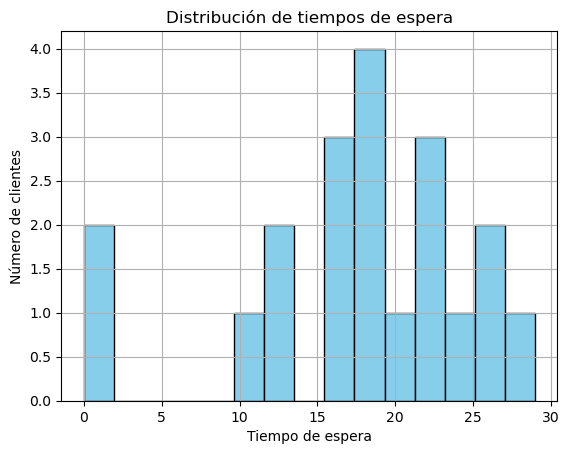


Clientes atendidos: 20
Tiempo promedio de espera: 17.44 unidades de tiempo


In [11]:
# Crear entorno de simulación
env = simpy.Environment()
servidor = simpy.Resource(env, capacity=1)
env.process(generador_clientes(env, servidor))
env.run(until=TIEMPO_SIMULACION)

# Mostrar resultados
plt.hist(tiempos_espera, bins=15, color='skyblue', edgecolor='black')
plt.title("Distribución de tiempos de espera")
plt.xlabel("Tiempo de espera")
plt.ylabel("Número de clientes")
plt.grid(True)
plt.show()

# Estadísticas
print(f"\nClientes atendidos: {len(tiempos_espera)}")
print(f"Tiempo promedio de espera: {sum(tiempos_espera)/len(tiempos_espera):.2f} unidades de tiempo")